Q-table learning


In [ ]:
import gym
import numpy as np

In [ ]:
env = gym.make('FrozenLake-v1')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Set learning parameters
lr = .8
y = .95
num_episodes = 2000
#create lists to contain total rewards and steps per episode
#jList = []
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [ ]:
print("Score over time: " +  str(sum(rList)/num_episodes))

Score over time: 0.5095


In [ ]:
print("Final Q-Table Values")
print(Q)

Final Q-Table Values
[[2.03080033e-01 7.38537400e-03 5.20803716e-03 5.51978341e-03]
 [3.64391699e-03 5.43660796e-04 1.71246500e-04 1.90038073e-01]
 [5.04521250e-03 3.90488493e-03 3.73337605e-03 1.77938098e-01]
 [4.41028192e-03 2.42738497e-05 3.41147343e-04 4.24433116e-02]
 [1.73084864e-01 4.78246669e-04 9.88384448e-04 2.75378913e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.19972368e-01 3.30961132e-05 9.87687412e-04 1.48993308e-10]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.16183569e-04 3.72646821e-04 8.11997564e-05 2.93945432e-01]
 [2.04583275e-03 2.13138821e-01 2.21639045e-03 6.14210411e-04]
 [3.64794157e-01 1.25572634e-03 6.01733754e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.35296233e-03 1.67268316e-03 5.64273955e-01 8.10903768e-05]
 [0.00000000e+00 0.00000000e+00 8.75640903e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.

**Q-Network Learning**

In [ ]:
import gym
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
env = gym.make('FrozenLake-v1')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Implementing the network itself

In [ ]:
tf.reset_default_graph()

AttributeError: module 'tensorflow' has no attribute 'reset_default_graph'

In [ ]:
# Define inputs using tf.constant
inputs1 = tf.constant([[0.0] * 16], dtype=tf.float32)
W = tf.Variable(tf.random.uniform([16, 4], 0, 0.01))
Qout = tf.matmul(inputs1, W)
predict = tf.argmax(Qout, 1)

# Define nextQ as another constant (you can adjust according to your specific needs)
nextQ = tf.constant([[0.0] * 4], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))

# Optimizer
trainer = tf.optimizers.SGD(learning_rate=0.1)

with tf.GradientTape() as tape:
    Qout = tf.matmul(inputs1, W)  # Recalculate Qout to be within tape's context
    loss = tf.reduce_sum(tf.square(nextQ - Qout))

grads = tape.gradient(loss, [W])
trainer.apply_gradients(zip(grads, [W]))


<KerasVariable shape=(), dtype=int64, path=SGD/iteration>

Training the network

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import gym

# Initialize environment
env = gym.make('FrozenLake-v1')

# Define network and training parameters
inputs1 = tf.placeholder(shape=[1, 16], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16, 4], 0, 0.01))
Qout = tf.matmul(inputs1, W)
predict = tf.argmax(Qout, 1)

nextQ = tf.placeholder(shape=[1, 4], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

init = tf.global_variables_initializer()

# Set learning parameters
y = 0.99
e = 0.1
num_episodes = 2000
jList = []
rList = []

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        # Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        while j < 99:
            j += 1
            # Choose an action by greedily (with e chance of random action) from the Q-network
            a, allQ = sess.run([predict, Qout], feed_dict={inputs1: np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            # Get new state and reward from environment
            s1, r, d, _ = env.step(a[0])
            # Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout, feed_dict={inputs1: np.identity(16)[s1:s1+1]})
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0, a[0]] = r + y * maxQ1
            # Train our network using target and predicted Q values
            _, W1 = sess.run([updateModel, W], feed_dict={inputs1: np.identity(16)[s:s+1], nextQ: targetQ})
            rAll += r
            s = s1
            if d == True:
                e = 1. / ((i / 50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print("Percent of successful episodes: " + str(sum(rList) / num_episodes) + "%")


Instructions for updating:
non-resource variables are not supported in the long term
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Percent of successful episodes: 0.391%


**Some statistics on network performance**

We can see that the network beings to consistly reach the goal around the 750 episode mark.

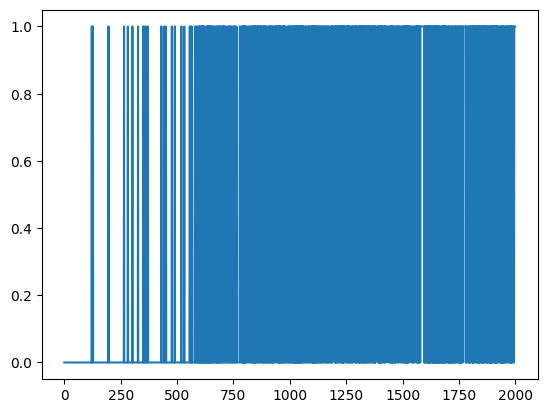

In [25]:
plt.plot(rList)

It also begins to progress through the environment for longer than chance aroudn the 750 mark as well.

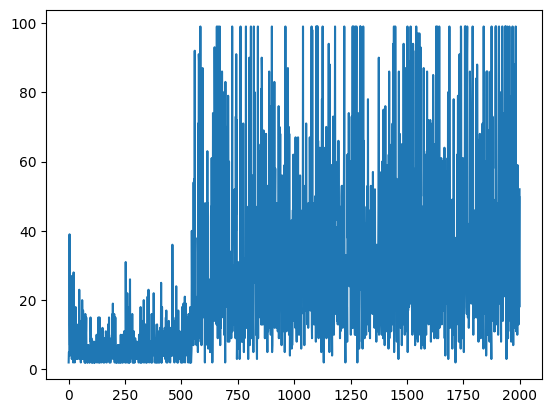

In [26]:
plt.plot(jList)